In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [117]:
job="developer_roles"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [118]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Dehazelabs,Junior Python Developer,Remote,300000.0,"CI/CD, Data modeling, Azure, Software troubles...",3.0,Developer Roles
1,Pulse Tech Digital,Java/J2EE Developer,Remote,900000.0,"Git, J2EE, MongoDB, Java, OOP",NaN,Developer Roles
2,client in excellent opportunity,Python Developer,Remote,1100000.0,"English, Research, Analysis skills, Quality as...",NaN,Developer Roles
3,Finpoint,Junior Front End Developer,Bengaluru,7800000.0,"Web design, CSS, Bootstrap, React, Git",5.0,Developer Roles
4,Metaphor Consulting,SQL Fresher Developer,Jamshedpur,6000000.0,SQL,5.0,Developer Roles


In [119]:
df.isnull().sum()

company_name               0
job_role                   0
job_location               0
salary_pa                  0
skills                    25
company_rating           885
standardized_job_role      0
dtype: int64

In [120]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [121]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
18,Giftech Software Solutions,Java Developer,India,0.0,"Java, OOP, Content development, Communication ...",NaN,Developer Roles
31,Aura Bizcom,Python Developer Intern,Remote,0.0,"Azure, CSS, React, Web development, Git",NaN,Developer Roles
36,Creative Web Solutions,Next.Js Developer Fresher,Remote,0.0,"React, English, Express.js, JavaScript, REST",5.0,Developer Roles
45,Emerinter,PYTHON DEVELOPER,India,0.0,"English, Python",NaN,Developer Roles
47,Antino Labs,Java Developer Intern,Gurgaon,0.0,"Relational databases, Git, Java, Databases, OOP",3.5,Developer Roles
...,...,...,...,...,...,...,...
1708,Elevati Infotech,Java Full Stack Developer,Maharashtra,0.0,"Gradle, Data structures, Research, Java, OOP",3.1,Developer Roles
1710,BigSpire Software,Java Developers - Freshers,India,0.0,"Java, Communication skills",3.9,Developer Roles
1712,Voyage Visa Guider Pvt Ltd,Developer New H1-B Sponsorship,Hyderābād,0.0,IT,NaN,Developer Roles
1714,BigSpire Software,PHP Developers - Freshers,India,0.0,"PHP, Communication skills, MySQL",3.9,Developer Roles


### Filling the null values by replacing with average salary of company rating

In [123]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [124]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [125]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Dehazelabs,Junior Python Developer,Remote,3.000000,"CI/CD, Data modeling, Azure, Software troubles...",3.0,Developer Roles
1,Pulse Tech Digital,Java/J2EE Developer,Remote,9.000000,"Git, J2EE, MongoDB, Java, OOP",0.0,Developer Roles
2,client in excellent opportunity,Python Developer,Remote,11.000000,"English, Research, Analysis skills, Quality as...",0.0,Developer Roles
3,Finpoint,Junior Front End Developer,Bengaluru,78.000000,"Web design, CSS, Bootstrap, React, Git",5.0,Developer Roles
4,Metaphor Consulting,SQL Fresher Developer,Jamshedpur,60.000000,SQL,5.0,Developer Roles
...,...,...,...,...,...,...,...
1720,"BimSym eBusiness Solutions, Inc",UI/UX Developers,India,10.051429,"Cloud architecture, APIs, IT",0.0,Developer Roles
1721,Daejoo automotive pvt india ltd,UI/UX Developer,India,3.300000,NaN,0.0,Developer Roles
1722,Topia LifeSciences,UI/UX Developer,India,3.500000,"Web design, CSS, Git, Responsive web design, G...",0.0,Developer Roles
1723,Jaya Medicals,UI/UX Developer with React Expertise,Chennai,2.880000,"React, JavaScript, UX, UI",0.0,Developer Roles


In [126]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [127]:
df.describe()

,salary_lpa,company_rating
count,1725.000000,1725.000000
mean,37.493199,1.917101
std,62.272967,2.021538
min,1.080000,0.000000
25%,5.000000,0.000000
50%,10.800000,0.000000
75%,64.800000,3.900000
max,1114.000000,5.000000


In [128]:
df.nunique()

company_name             1420
job_role                  644
job_location               89
salary_lpa                213
skills                   1521
company_rating             34
standardized_job_role       1
dtype: int64

In [129]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [131]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [132]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                             Skill  Count
16                             css    752
18                           react    675
41                         node.js    421
5                              git    381
20                      javascript    333
..                             ...    ...
277                       japanese      1
276                         french      1
275                    google docs      1
160                  colour theory      1
369  service-oriented architecture      1

[370 rows x 2 columns]


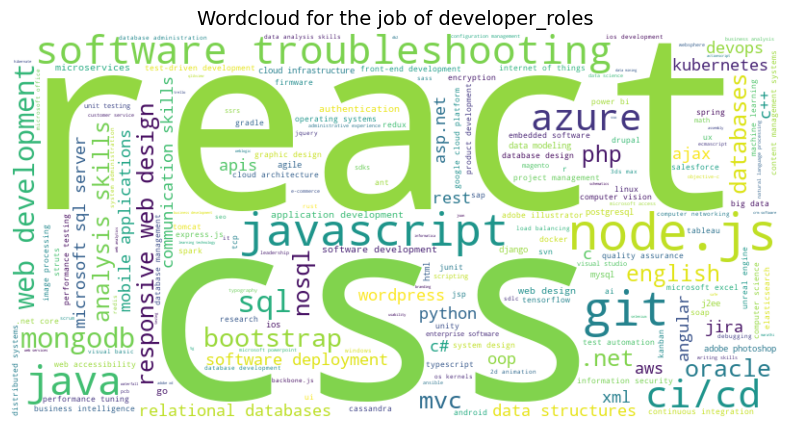

In [133]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


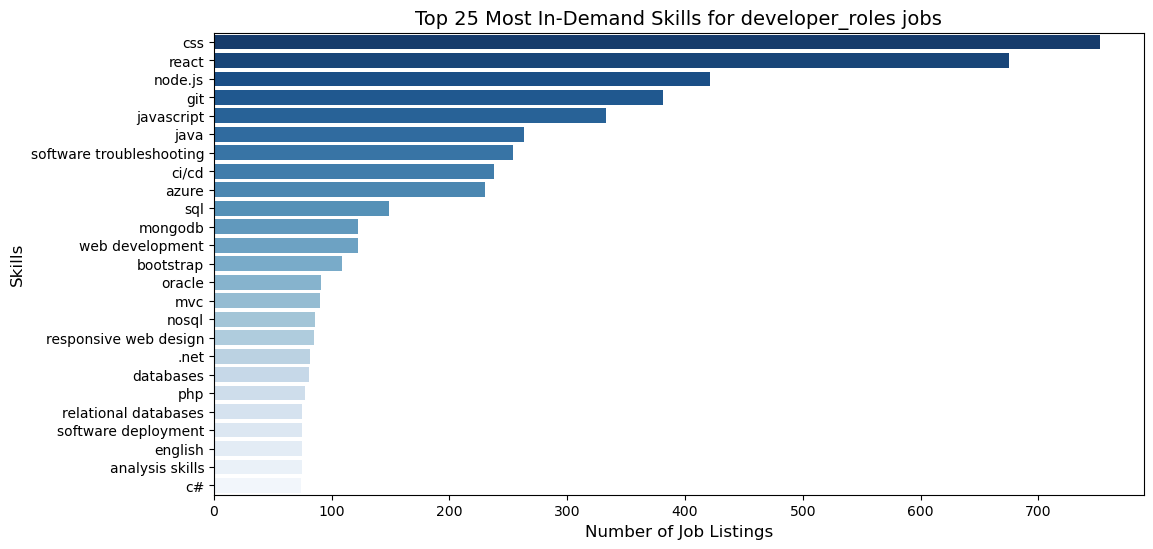

In [134]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [136]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                          company_name  salary_lpa
419                           Ensocode     1114.00
313                        DataEconomy      819.36
1110             Synkrama Technologies      684.00
251                  CodeRed Softwares      622.80
549                   I Tech solutions      360.00
209            CIAR Software Solutions      330.00
276              CornerTree Consulting      300.00
749       Milestone Technologies, Inc.      273.36
1144                        TeamEngine      240.00
1033  Seventh Contact Hiring Solutions      210.00


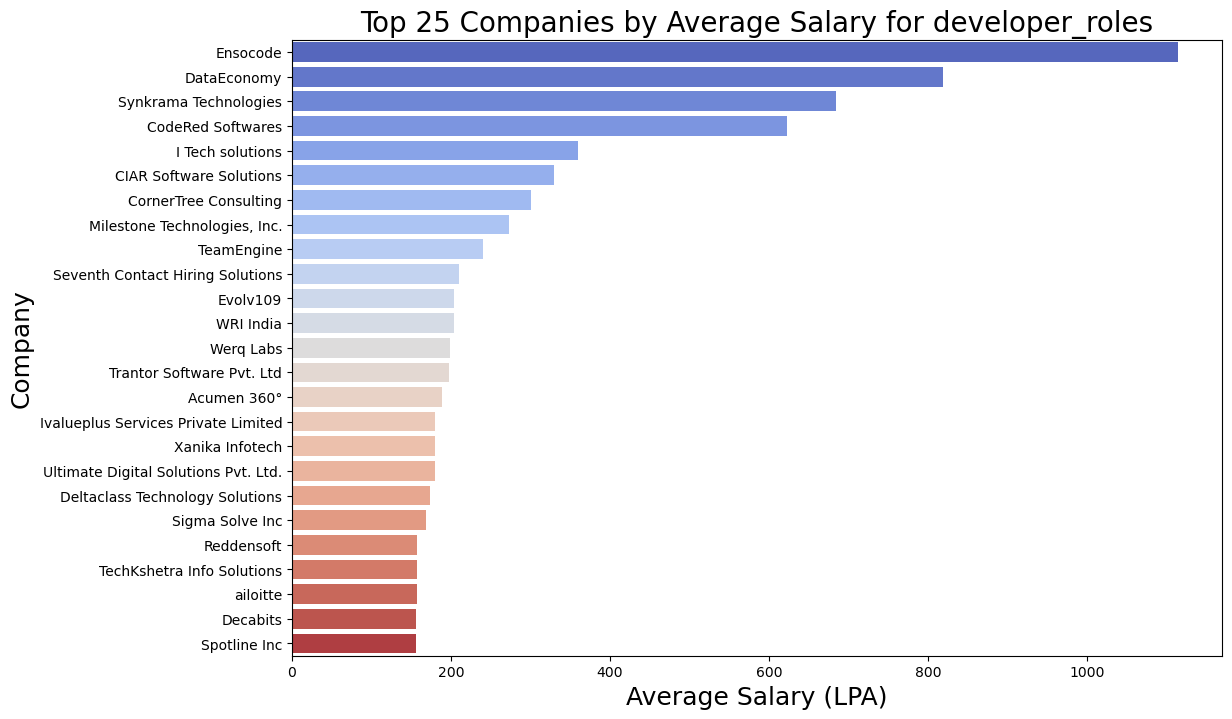

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

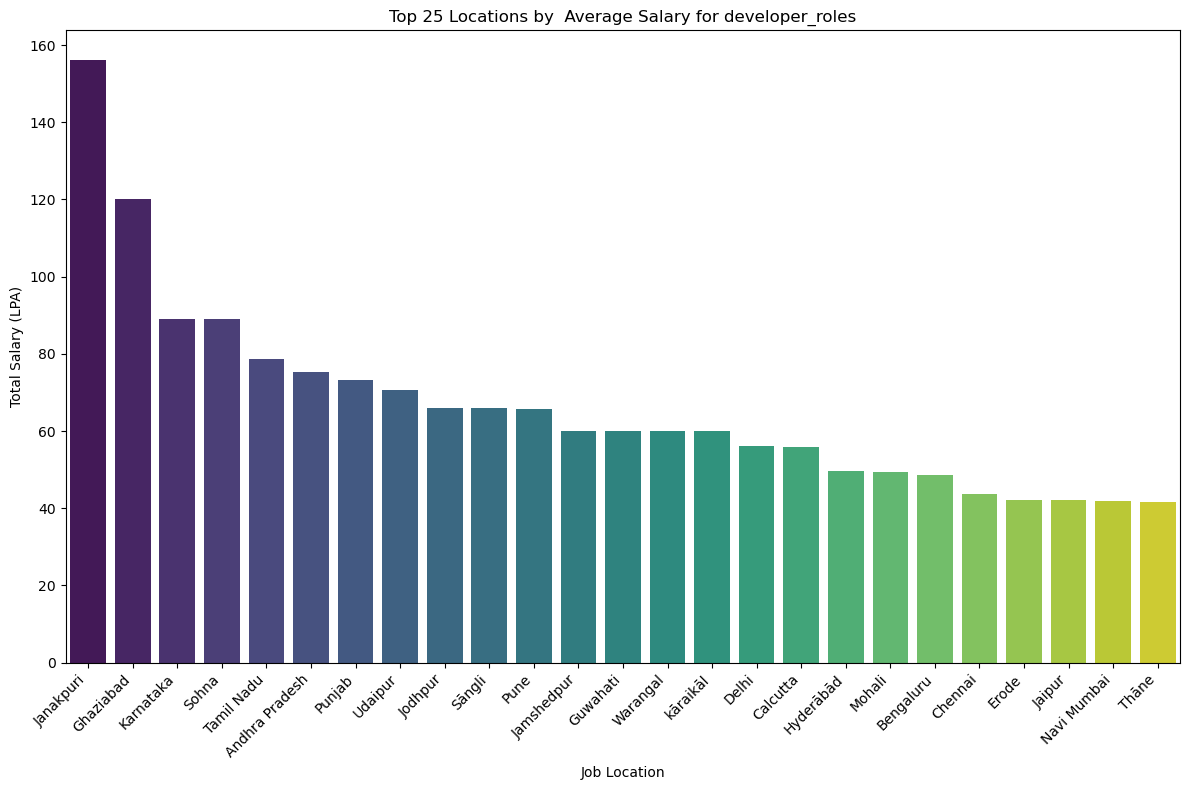

In [139]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

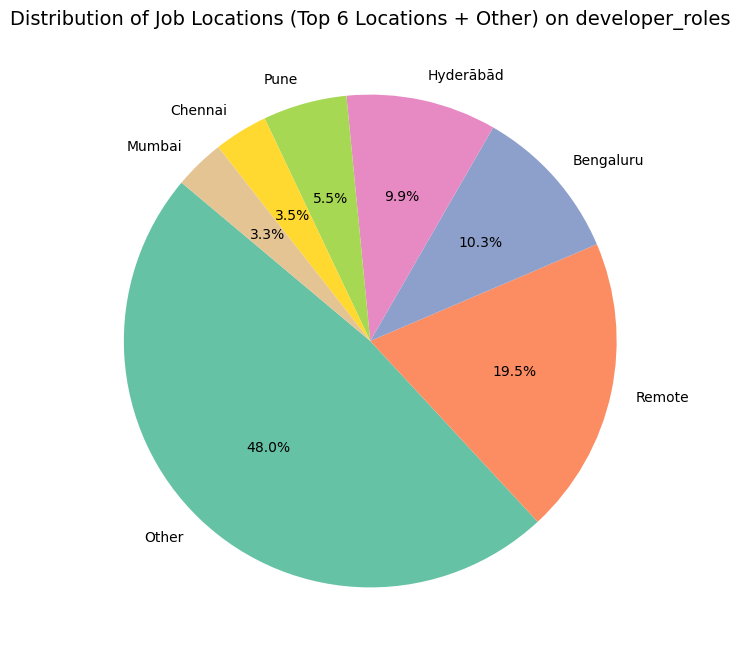

In [140]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

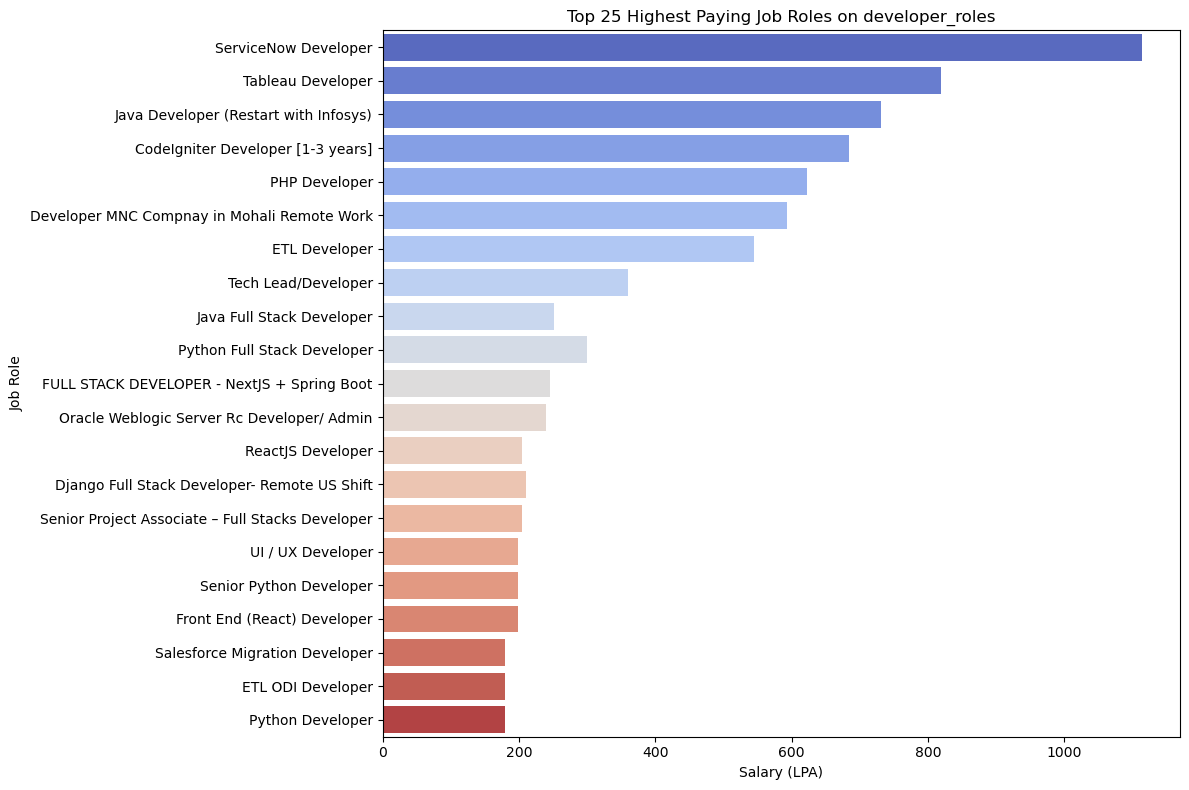

In [142]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [144]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_20592\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


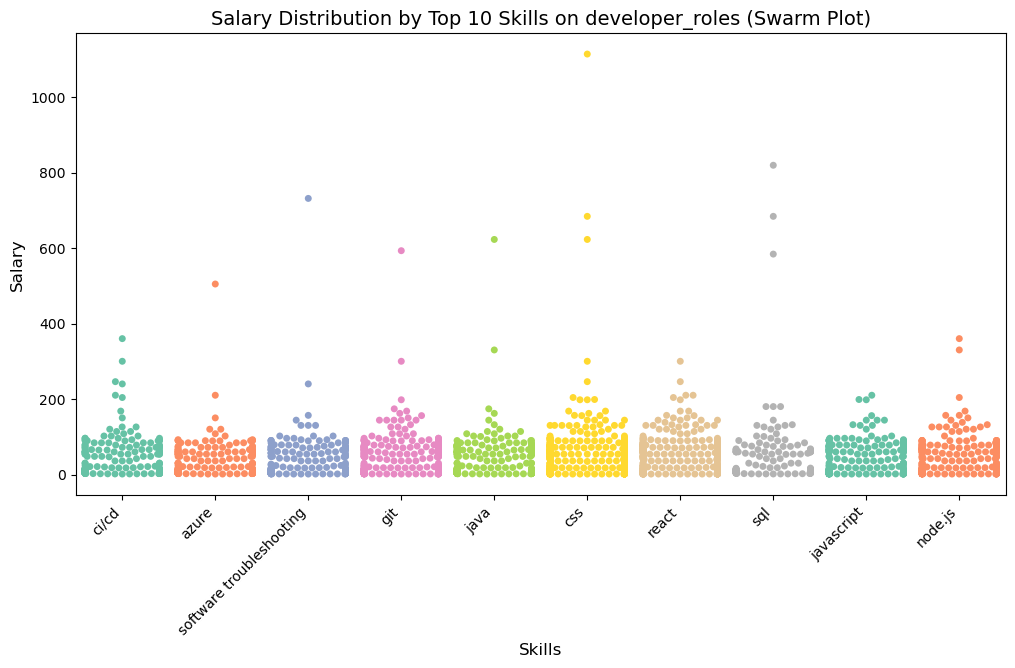

In [145]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

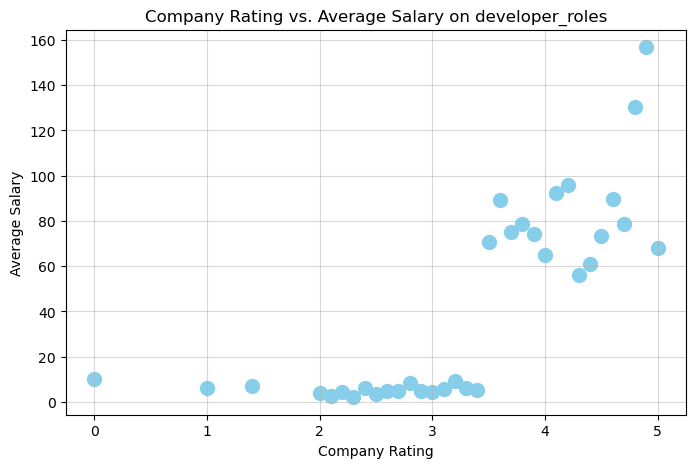

In [147]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [148]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.3263534095638863